# EDA

https://www.kaggle.com/ranjeetjain3/deep-learning-using-sign-langugage

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
dataset_path = '../data/language/'

In [3]:
train_data = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_train.csv'))

In [4]:
test_data = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_test.csv'))

In [5]:
print('Dataframe Shape:', train_data.shape)

('Dataframe Shape:', (27455, 785))


In [6]:
train_data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


In [7]:
X_train = train_data.iloc[:, 1:].values

In [8]:
X_train.shape

(27455, 784)

In [9]:
X_train[0]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156, 158, 160, 163,
       165, 159, 166, 168, 170, 170, 171, 171, 171, 172, 171, 171, 170,
       170, 169, 111, 121, 129, 135, 141, 144, 148, 151, 154, 157, 160,
       163, 164, 170, 119, 152, 171, 171, 170, 171, 172, 172, 172, 172,
       172, 171, 171, 170, 113, 123, 131, 137, 142, 145, 150, 152, 155,
       158, 161, 163, 164, 172, 105, 142, 170, 171, 171, 171, 172, 172,
       173, 173, 172, 171, 171, 171, 116, 125, 133, 139, 143, 146, 151,
       153, 156, 159, 162, 163, 167, 167,  95, 144, 171, 172, 172, 172,
       172, 172, 173, 173, 173, 172, 172, 171, 117, 126, 134, 140, 145,
       149, 153, 156, 158, 161, 163, 164, 175, 156,  87, 154, 172, 173,
       173, 173, 173, 173, 174, 174, 174, 173, 172, 172, 119, 128, 136,
       142, 146, 150, 153, 156, 159, 163, 165, 164, 184, 148,  89, 164,
       172, 174, 174, 174, 174, 175, 175, 174, 175, 174, 173, 173, 122,
       130, 138, 143, 147, 150, 154, 158, 162, 165, 166, 172, 18

In [24]:
X_test = test_data.iloc[:, 1:].values

In [25]:
X_test.shape

(7172, 784)

In [8]:
y_train = train_data.iloc[:, :1].values.flatten()

In [9]:
y_train

array([ 3,  6,  2, ..., 18, 17, 23])

In [26]:
y_test = test_data.iloc[:, :1].values.flatten()

In [27]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2])

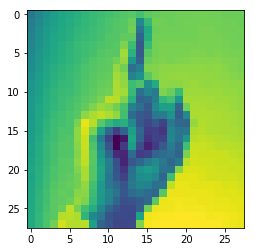

In [10]:
plt.imshow(X_train[0].reshape(28, 28))
plt.show()

In [11]:
def display(index, x, y):
    plt.imshow(x[index].reshape(28, 28), cmap = 'gray')
    plt.title(str(y[index]))
    plt.show()

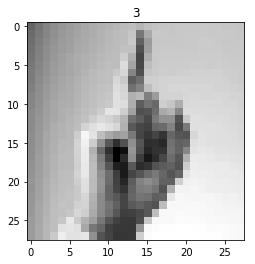

In [12]:
display(0, X_train, y_train)

In [20]:
X_train[0][:10]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156])

In [21]:
X_train = X_train / 255.

In [22]:
X_train[0][:10]

array([ 0.41960784,  0.4627451 ,  0.49803922,  0.5254902 ,  0.54509804,
        0.56078431,  0.57254902,  0.58823529,  0.6       ,  0.61176471])

In [29]:
X_test = X_test / 255.

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [32]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
y_train_encoded = to_categorical(y_train)

In [15]:
y_train_encoded

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [28]:
y_test_encoded = to_categorical(y_test)

In [16]:
# inverting to find out the number
np.argmax(y_train_encoded[0])

3

In [41]:
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [42]:
y_train_encoded.shape, y_test_encoded.shape

((27455, 25), (7172, 25))

## Train

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [63]:
# Hyperparameters
batch_size = 128
num_classes = 25
epochs = 10

In [64]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
__________

In [66]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [67]:
history = model.fit(X_train, 
                    y_train_encoded, 
                    validation_data = (X_test, y_test_encoded), 
                    epochs=epochs, 
                    batch_size=batch_size)

Train on 27455 samples, validate on 7172 samples
Epoch 1/10
27455/27455 [==============================] - 58s 2ms/step - loss: 2.2280 - acc: 0.3122 - val_loss: 1.1756 - val_acc: 0.6069
Epoch 2/10
27455/27455 [==============================] - 63s 2ms/step - loss: 0.8104 - acc: 0.7278 - val_loss: 0.7014 - val_acc: 0.7649
Epoch 3/10
27455/27455 [==============================] - 63s 2ms/step - loss: 0.4321 - acc: 0.8527 - val_loss: 0.5261 - val_acc: 0.8246
Epoch 4/10
27455/27455 [==============================] - 62s 2ms/step - loss: 0.2486 - acc: 0.9162 - val_loss: 0.4569 - val_acc: 0.8465
Epoch 5/10
27455/27455 [==============================] - 63s 2ms/step - loss: 0.1498 - acc: 0.9525 - val_loss: 0.4333 - val_acc: 0.8624
Epoch 6/10
27455/27455 [==============================] - 62s 2ms/step - loss: 0.0933 - acc: 0.9726 - val_loss: 0.3994 - val_acc: 0.8887
Epoch 7/10
27455/27455 [==============================] - 56s 2ms/step - loss: 0.0595 - acc: 0.9838 - val_loss: 0.4543 - val_acc:

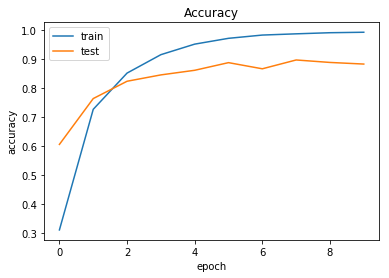

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [70]:
'Validation accuracy:', history.history['val_acc'][-1]

('Validation accuracy:', 0.88385387618516453)